<a href="https://colab.research.google.com/github/anjalidubeyy/sdg-project-machine-learning-/blob/main/ml_project_final_code(unsdg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive/MyDrive/un_project_data'


Mounted at /content/drive
cleaned_dataset.csv	     SH_ACS_DTP3.xlsx  SH_ACS_PCV3.xlsx  SH_DYN_MORT.xlsx
cleaned_health_sdg_data.csv  SH_ACS_HPV.xlsx   SH_ACS_UNHC.xlsx  SH_DYN_NMRT.xlsx
combined_dataset.csv	     SH_ACS_MCV2.xlsx  SH_DTH_NCD.xlsx	 SH_STA_MORT.xlsx


In [2]:
import pandas as pd

# Load the dataset
file_path = '/mnt/data/cleaned_dataset.csv'
data = pd.read_csv('/content/drive/MyDrive/un_project_data/cleaned_dataset.csv')

# Display basic information about the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()


Dataset Head:
    Goal Target Indicator   SeriesCode         SeriesDescription  GeoAreaCode  \
0     3    3.1     3.1.1  SH_STA_MORT  Maternal mortality ratio            4   
1     3    3.1     3.1.1  SH_STA_MORT  Maternal mortality ratio            2   
2     3    3.1     3.1.1  SH_STA_MORT  Maternal mortality ratio            8   
3     3    3.1     3.1.1  SH_STA_MORT  Maternal mortality ratio           12   
4     3    3.1     3.1.1  SH_STA_MORT  Maternal mortality ratio           19   

   GeoAreaName  Age Reporting Type     Sex  ...        2014       2015  \
0  Afghanistan  <5Y              G  FEMALE  ...  539.198722  775.69274   
1       Africa  <5Y              G  FEMALE  ...  539.198722  526.33196   
2      Albania  <5Y              G  FEMALE  ...    7.009860    6.87828   
3      Algeria  <5Y              G  FEMALE  ...   86.151460   89.13265   
4     Americas  <5Y              G  FEMALE  ...   57.419140   58.25032   

         2016        2017        2018       2019        202

In [3]:
# Inspect column names
print("Column names in the dataset:\n", data.columns)


Column names in the dataset:
 Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'Age', 'Reporting Type', 'Sex', 'Units',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022',
       'Name of non-communicable disease'],
      dtype='object')


In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data_path = '/mnt/data/cleaned_dataset.csv'
data = pd.read_csv('/content/drive/MyDrive/un_project_data/cleaned_dataset.csv')
# Fill missing values (adjust as needed)
data = data.fillna(method='ffill')  # Example: forward fill

# Display column names
print("Column names in the dataset:", data.columns)

# Separate features (X) and target (y)
# We'll use '2022' as the target column
X = data.drop(columns=['2022'])  # Drop the target column
y = data['2022']  # Select the target column

# Separate numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Impute missing values in numeric columns
imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = imputer.fit_transform(X[numeric_cols])

# Handle non-numeric columns (e.g., by encoding or filling missing values)
# Here, we'll use label encoding as an example
X_non_numeric = X[non_numeric_cols].apply(lambda col: col.fillna('Unknown'))
label_encoders = {}
for col in X_non_numeric.columns:
    le = LabelEncoder()
    X_non_numeric[col] = le.fit_transform(X_non_numeric[col].astype(str))
    label_encoders[col] = le

# Combine numeric and non-numeric data back together
import numpy as np

X_imputed = np.hstack((X_numeric_imputed, X_non_numeric.values))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Column names in the dataset: Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'Age', 'Reporting Type', 'Sex', 'Units',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022',
       'Name of non-communicable disease'],
      dtype='object')
X_train shape: (3834, 34)
X_test shape: (959, 34)
y_train shape: (3834,)
y_test shape: (959,)


<ipython-input-30-0a031c598104>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Example: forward fill


Number of NaNs in y: 3022
NaNs in X_train_cv: 0
NaNs in y_train_cv: 0
NaNs in X_train_cv: 0
NaNs in y_train_cv: 0
NaNs in X_train_cv: 0
NaNs in y_train_cv: 0
NaNs in X_train_cv: 0
NaNs in y_train_cv: 0
NaNs in X_train_cv: 0
NaNs in y_train_cv: 0
Linear Regression: Mean MSE = 25.73597153748176
Decision Tree: Mean MSE = 36.11590722482623
Random Forest: Mean MSE = 21.353546273902403
SVM: Mean MSE = 28.308548037591304
Lasso: Mean MSE = 44.41478202097062
Ridge: Mean MSE = 25.67266023557915


<ipython-input-28-4d527d21233b>:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(average_mse.keys()), y=list(average_mse.values()), palette="viridis")


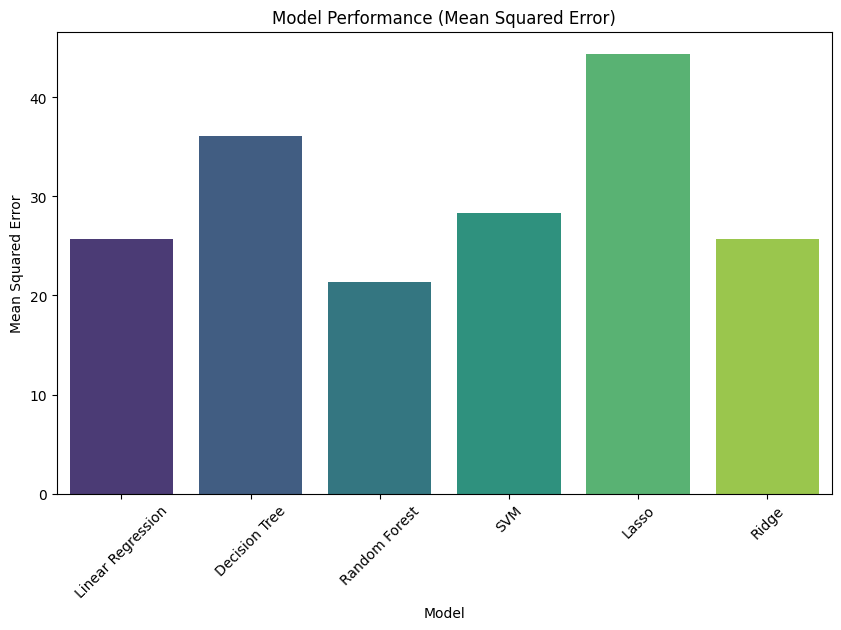

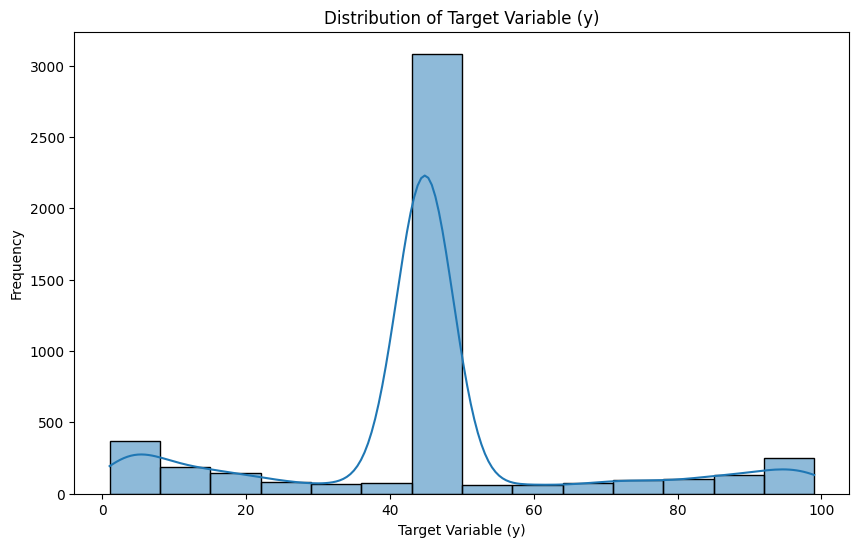

In [28]:
#PREPROCESSING AND KFOLD CROSS VALIDATION
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/un_project_data/cleaned_dataset.csv')

# Identify the target and features
X = data.drop(columns=['2022'])  # Target column
y = data['2022']  # Target column

# Check for NaN values in y
print("Number of NaNs in y:", y.isna().sum())

# Fill NaNs in the target variable with the mean
y = y.fillna(y.mean())

# Handle categorical features
non_numeric_cols = X.select_dtypes(include=['object']).columns
for column in non_numeric_cols:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Ensure y is not NaN and fill with the mean again (just to be safe)
y = y.fillna(y.mean())

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {
    'Linear Regression': [],
    'Decision Tree': [],
    'Random Forest': [],
    'SVM': [],
    'Lasso': [],
    'Ridge': []
}

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X[train_index], X[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Check for NaNs in train and test splits
    print("NaNs in X_train_cv:", pd.isna(X_train_cv).sum().sum())
    print("NaNs in y_train_cv:", pd.isna(y_train_cv).sum())

    # Handle NaNs in y_train_cv and y_test_cv
    y_train_cv = y_train_cv.fillna(y_train_cv.mean())
    y_test_cv = y_test_cv.fillna(y_test_cv.mean())

    # Feature scaling
    scaler = StandardScaler()
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_test_cv = scaler.transform(X_test_cv)

    # Train and evaluate models
    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train_cv, y_train_cv)
    lr_predictions = lr_model.predict(X_test_cv)
    lr_mse = mean_squared_error(y_test_cv, lr_predictions)
    results['Linear Regression'].append(lr_mse)

    # Decision Tree
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train_cv, y_train_cv)
    dt_predictions = dt_model.predict(X_test_cv)
    dt_mse = mean_squared_error(y_test_cv, dt_predictions)
    results['Decision Tree'].append(dt_mse)

    # Random Forest
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train_cv, y_train_cv)
    rf_predictions = rf_model.predict(X_test_cv)
    rf_mse = mean_squared_error(y_test_cv, rf_predictions)
    results['Random Forest'].append(rf_mse)

    # Support Vector Machine
    svm_model = SVR()
    svm_model.fit(X_train_cv, y_train_cv)
    svm_predictions = svm_model.predict(X_test_cv)
    svm_mse = mean_squared_error(y_test_cv, svm_predictions)
    results['SVM'].append(svm_mse)

    # Lasso Regression
    lasso_model = Lasso()
    lasso_model.fit(X_train_cv, y_train_cv)
    lasso_predictions = lasso_model.predict(X_test_cv)
    lasso_mse = mean_squared_error(y_test_cv, lasso_predictions)
    results['Lasso'].append(lasso_mse)

    # Ridge Regression
    ridge_model = Ridge()
    ridge_model.fit(X_train_cv, y_train_cv)
    ridge_predictions = ridge_model.predict(X_test_cv)
    ridge_mse = mean_squared_error(y_test_cv, ridge_predictions)
    results['Ridge'].append(ridge_mse)

# Display results
for model_name, mse_list in results.items():
    print(f"{model_name}: Mean MSE = {sum(mse_list) / len(mse_list)}")

# Visualizations
# 1. Model Performance Visualization
# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results)

# Create a line plot showing MSE variation across folds

# Calculate average MSE for each model
average_mse = {model: np.mean(mse_list) for model, mse_list in results.items()}

# Create a bar chart for average MSE of each model
plt.figure(figsize=(10, 6))
sns.barplot(x=list(average_mse.keys()), y=list(average_mse.values()), palette="viridis")
plt.title('Model Performance (Mean Squared Error)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# 2. Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Frequency')
plt.show()

NaN values in X_train: 0
NaN values in y_train: 167
NaN values in y_test: 58
Linear Regression Model
Train MSE: 36.67, Test MSE: 24.80
Train R^2: 0.94, Test R^2: 0.96


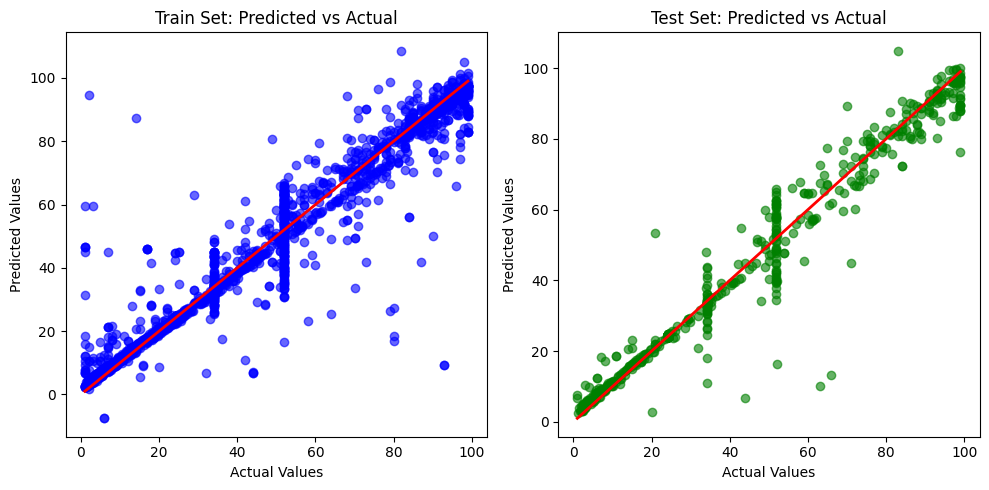

In [6]:
#LINEAR REGRESSION
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check for NaN values in X_train, y_train, and y_test
print(f"NaN values in X_train: {np.isnan(X_train).sum()}")
print(f"NaN values in y_train: {np.isnan(y_train).sum()}")
print(f"NaN values in y_test: {np.isnan(y_test).sum()}")

# Handle missing values by imputing with the mean for both X_train, y_train, and y_test
imputer = SimpleImputer(strategy='mean')

# Ensure X_train and X_test are numpy arrays
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Handle y_train and y_test, ensuring they are pandas Series or numpy arrays
# If they are pandas Series, convert them to numpy arrays for reshaping
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()

# Impute missing values in y_train and y_test
y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()  # Reshape for imputation
y_test = imputer.transform(y_test.reshape(-1, 1)).ravel()        # Handle missing values in y_test

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Print the results
print("Linear Regression Model")
print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
print(f"Train R^2: {train_r2:.2f}, Test R^2: {test_r2:.2f}")

# Visualize the predictions vs actual values for training and test sets
plt.figure(figsize=(10, 5))

# Plot for training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)
plt.title("Train Set: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title("Test Set: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9869587897756912
Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2994
         1.0       0.97      0.97      0.97       840

    accuracy                           0.99      3834
   macro avg       0.98      0.98      0.98      3834
weighted avg       0.99      0.99      0.99      3834

Testing Accuracy: 0.9822732012513035
Testing Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       720
         1.0       0.97      0.95      0.96       239

    accuracy                           0.98       959
   macro avg       0.98      0.97      0.98       959
weighted avg       0.98      0.98      0.98       959



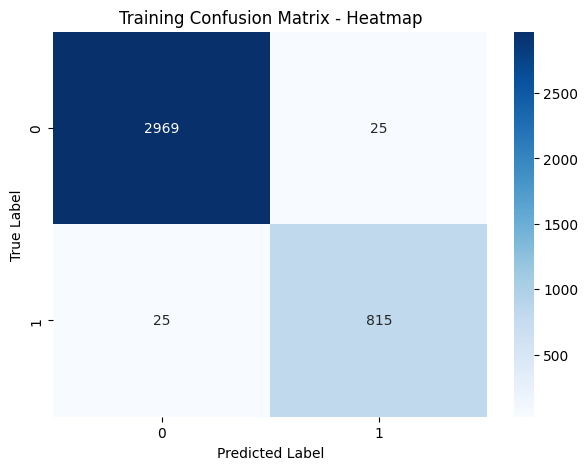

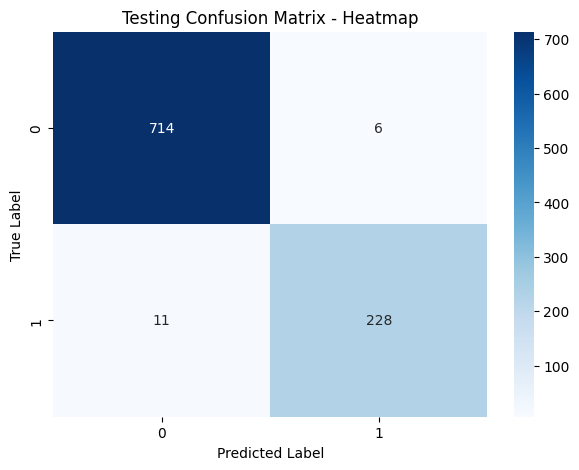

In [7]:
#LOGISTIC REGRESSION
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer  # To convert continuous to categorical
import matplotlib.pyplot as plt
import seaborn as sns

# If y_train is continuous, convert it to discrete bins (for classification)
# Here, we use KBinsDiscretizer to create discrete categories from continuous data
binning = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')  # Adjust 'n_bins' based on your case

y_train_binned = binning.fit_transform(y_train.reshape(-1, 1)).ravel()  # Convert continuous target to discrete classes
y_test_binned = binning.transform(y_test.reshape(-1, 1)).ravel()  # Apply the same transformation to y_test

# Instantiate and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train_binned)

# Predictions for both training and testing sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Training evaluation
train_accuracy = accuracy_score(y_train_binned, y_train_pred)
train_class_report = classification_report(y_train_binned, y_train_pred)

# Testing evaluation
test_accuracy = accuracy_score(y_test_binned, y_test_pred)
test_class_report = classification_report(y_test_binned, y_test_pred)

# Print evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:\n", train_class_report)

print("Testing Accuracy:", test_accuracy)
print("Testing Classification Report:\n", test_class_report)

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train_binned, y_train_pred)

# Confusion matrix for testing data
test_conf_matrix = confusion_matrix(y_test_binned, y_test_pred)

# Visualize training confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Training Confusion Matrix - Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize testing confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Testing Confusion Matrix - Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


KNN - Training Accuracy: 0.976264997391758
KNN - Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2994
         1.0       0.93      0.96      0.95       840

    accuracy                           0.98      3834
   macro avg       0.96      0.97      0.97      3834
weighted avg       0.98      0.98      0.98      3834

KNN - Testing Accuracy: 0.9749739311783108
KNN - Testing Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       720
         1.0       0.95      0.95      0.95       239

    accuracy                           0.97       959
   macro avg       0.97      0.97      0.97       959
weighted avg       0.97      0.97      0.97       959



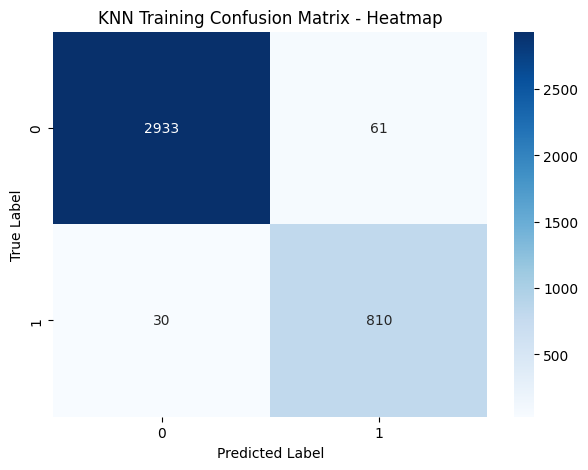

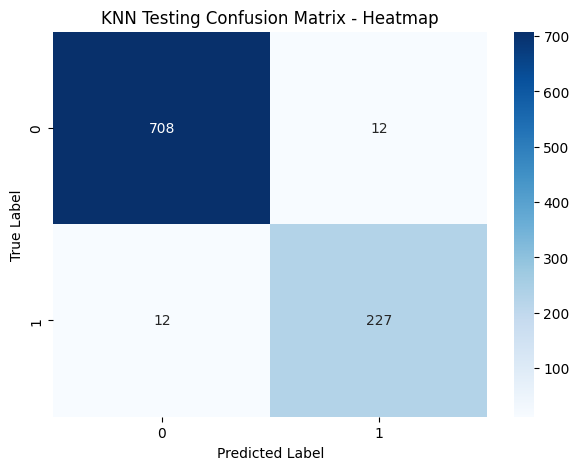

In [22]:
#KNN
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer  # To convert continuous to categorical
import matplotlib.pyplot as plt
import seaborn as sns

# If y_train and y_test are continuous, convert them to discrete bins (for classification)
# Here, we use KBinsDiscretizer to create discrete categories from continuous data
binning = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')  # Adjust 'n_bins' as needed

y_train_binned = binning.fit_transform(y_train.reshape(-1, 1)).ravel()  # Convert continuous target to discrete classes
y_test_binned = binning.transform(y_test.reshape(-1, 1)).ravel()        # Apply the same transformation to y_test

# Instantiate and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_binned)

# Predict on the test set
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training evaluation
train_accuracy = accuracy_score(y_train_binned, y_train_pred)
train_class_report = classification_report(y_train_binned, y_train_pred)

# Testing evaluation
test_accuracy = accuracy_score(y_test_binned, y_test_pred)
test_class_report = classification_report(y_test_binned, y_test_pred)

# Print evaluation metrics
print("KNN - Training Accuracy:", train_accuracy)
print("KNN - Training Classification Report:\n", train_class_report)

print("KNN - Testing Accuracy:", test_accuracy)
print("KNN - Testing Classification Report:\n", test_class_report)

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train_binned, y_train_pred)

# Confusion matrix for testing data
test_conf_matrix = confusion_matrix(y_test_binned, y_test_pred)

# Visualize training confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Training Confusion Matrix - Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize testing confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Testing Confusion Matrix - Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


NaN values found in training target variable. Handling them...
NaN values found in testing target variable. Handling them...
Decision Tree - Training Accuracy: 1.0
Decision Tree - Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2994
         1.0       1.00      1.00      1.00       840

    accuracy                           1.00      3834
   macro avg       1.00      1.00      1.00      3834
weighted avg       1.00      1.00      1.00      3834

Decision Tree - Testing Accuracy: 0.9781021897810219
Decision Tree - Testing Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       720
         1.0       0.96      0.95      0.96       239

    accuracy                           0.98       959
   macro avg       0.97      0.97      0.97       959
weighted avg       0.98      0.98      0.98       959



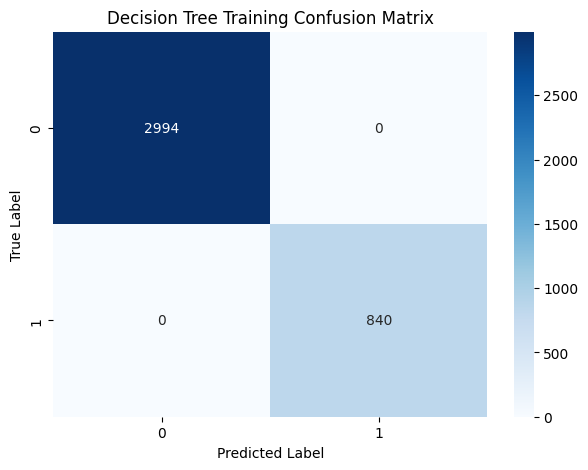

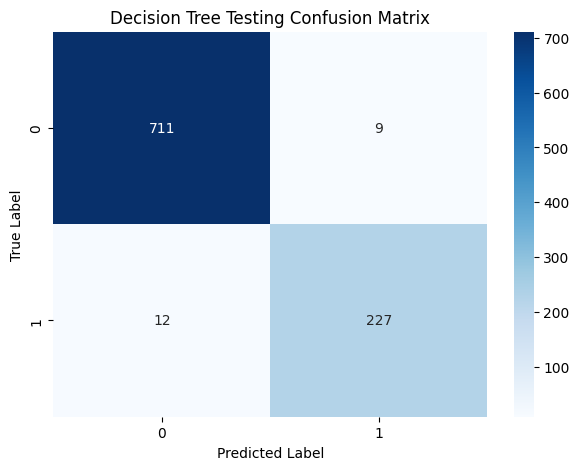

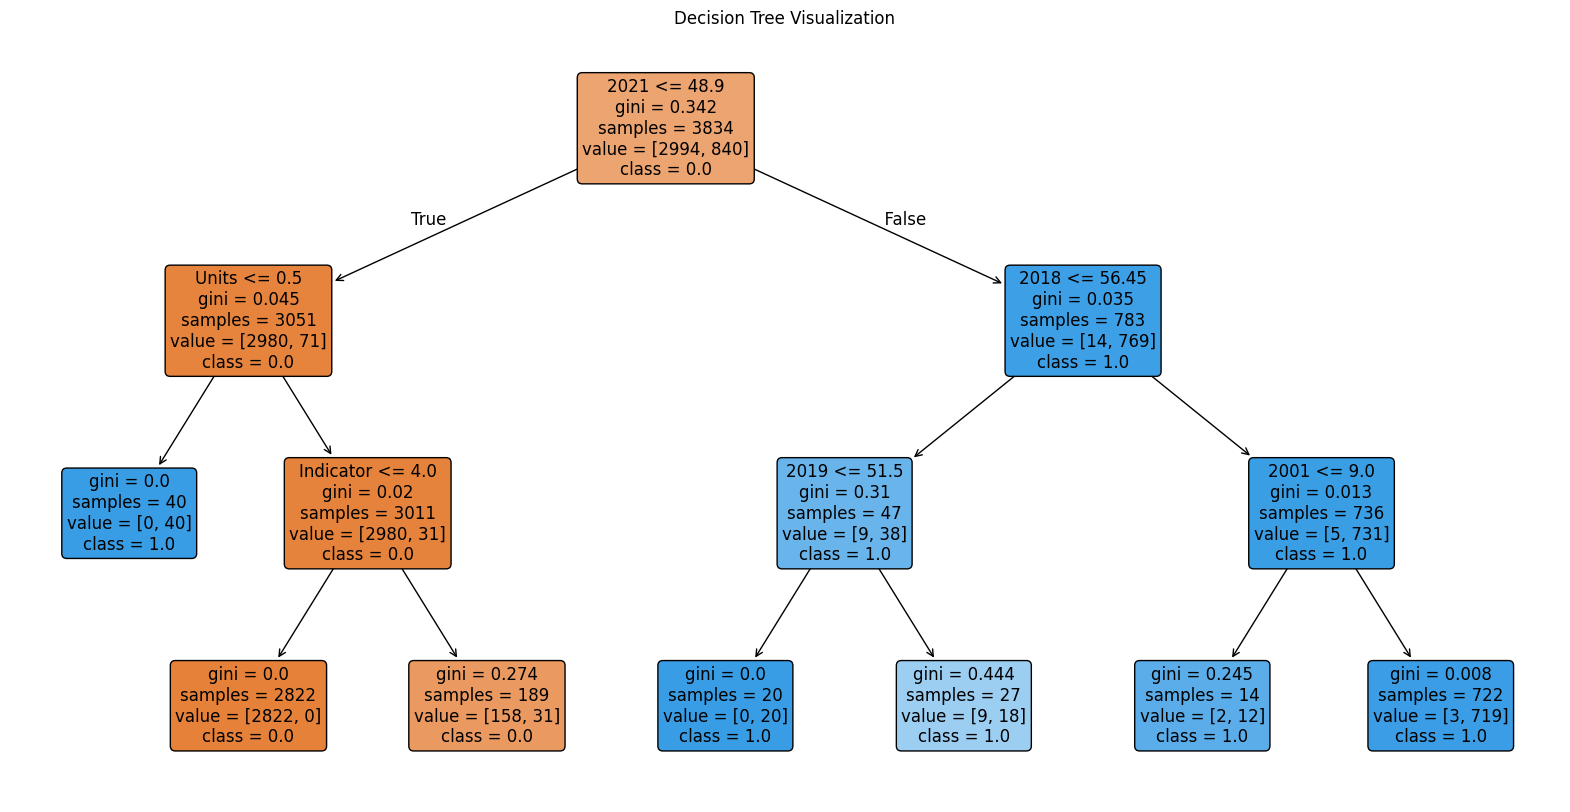

In [31]:
#DECISION TREEE
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Check for NaN values in y_train after the split
if np.isnan(y_train).any():
    print("NaN values found in training target variable. Handling them...")
    y_train = np.nan_to_num(y_train)  # Or use y_train = y_train.fillna(y_train.mean())

if np.isnan(y_test).any():
    print("NaN values found in testing target variable. Handling them...")
    y_test = np.nan_to_num(y_test)  # Or use y_test = y_test.fillna(y_test.mean())

# Convert y_train and y_test to discrete classes
binning = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')  # Set n_bins to 2 for binary classification
y_train_binned = binning.fit_transform(y_train.reshape(-1, 1)).ravel()  # Use y_train.values.reshape(-1, 1) if needed
y_test_binned = binning.transform(y_test.reshape(-1, 1)).ravel()  # Same here

# Instantiate and train the Decision Tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train_binned)

# Predict on the training and test set
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Training evaluation
train_accuracy = accuracy_score(y_train_binned, y_train_pred)
train_class_report = classification_report(y_train_binned, y_train_pred)

# Testing evaluation
test_accuracy = accuracy_score(y_test_binned, y_test_pred)
test_class_report = classification_report(y_test_binned, y_test_pred)

# Print evaluation metrics
print("Decision Tree - Training Accuracy:", train_accuracy)
print("Decision Tree - Training Classification Report:\n", train_class_report)

print("Decision Tree - Testing Accuracy:", test_accuracy)
print("Decision Tree - Testing Classification Report:\n", test_class_report)

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train_binned, y_train_pred)

# Confusion matrix for testing data
test_conf_matrix = confusion_matrix(y_test_binned, y_test_pred)

# Visualize training confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize testing confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Testing Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize the Decision Tree
# Prune the tree by limiting the maximum depth
tree = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=20, min_samples_leaf=10)
tree.fit(X_train, y_train_binned)

# Visualize the pruned Decision Tree
plt.figure(figsize=(20, 10))  # Adjust the figure size
plot_tree(
    tree,
    filled=True,
    feature_names=numeric_cols.tolist() + non_numeric_cols.tolist(),
    class_names=[str(i) for i in np.unique(y_train_binned)],
    rounded=True,
    fontsize=12  # Increase font size for readability
)
plt.title("Decision Tree Visualization")
plt.show()




Random Forest - Training Accuracy: 1.0
Random Forest - Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2994
         1.0       1.00      1.00      1.00       840

    accuracy                           1.00      3834
   macro avg       1.00      1.00      1.00      3834
weighted avg       1.00      1.00      1.00      3834

Random Forest - Testing Accuracy: 0.9874869655891554
Random Forest - Testing Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       720
         1.0       0.97      0.97      0.97       239

    accuracy                           0.99       959
   macro avg       0.98      0.98      0.98       959
weighted avg       0.99      0.99      0.99       959



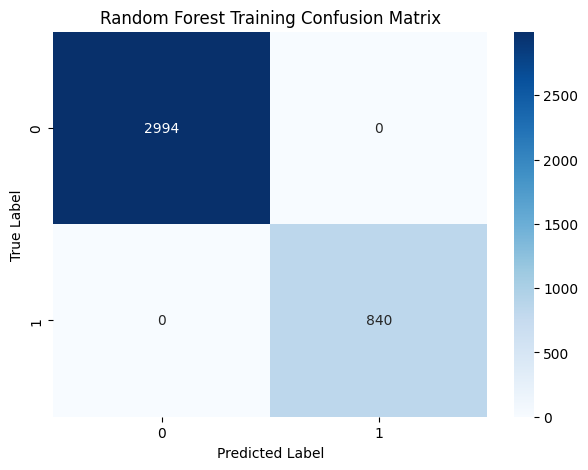

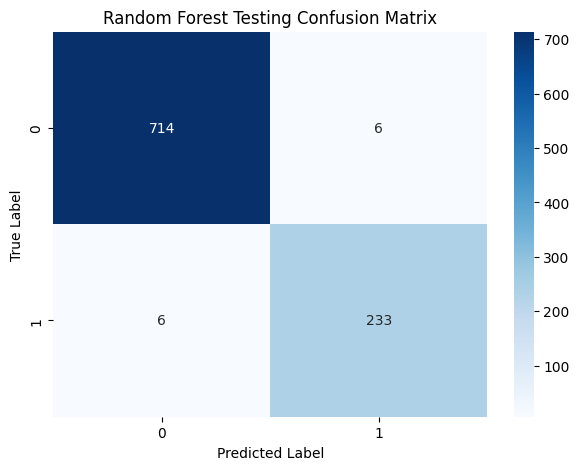

In [10]:
#RANDOM FOREST
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer  # To convert continuous to categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# If y_train and y_test are continuous, convert them to discrete bins (for classification)
binning = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')  # Adjust 'n_bins' as needed

y_train_binned = binning.fit_transform(y_train.reshape(-1, 1)).ravel()  # Convert continuous target to discrete classes
y_test_binned = binning.transform(y_test.reshape(-1, 1)).ravel()        # Apply the same transformation to y_test

# Instantiate and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_binned)

# Predict on the training set
y_train_pred = rf.predict(X_train)

# Predict on the test set
y_test_pred = rf.predict(X_test)

# Training evaluation
train_accuracy = accuracy_score(y_train_binned, y_train_pred)
train_class_report = classification_report(y_train_binned, y_train_pred)

# Testing evaluation
test_accuracy = accuracy_score(y_test_binned, y_test_pred)
test_class_report = classification_report(y_test_binned, y_test_pred)

# Print evaluation metrics
print("Random Forest - Training Accuracy:", train_accuracy)
print("Random Forest - Training Classification Report:\n", train_class_report)

print("Random Forest - Testing Accuracy:", test_accuracy)
print("Random Forest - Testing Classification Report:\n", test_class_report)

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train_binned, y_train_pred)

# Confusion matrix for testing data
test_conf_matrix = confusion_matrix(y_test_binned, y_test_pred)

# Visualize training confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize testing confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Testing Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Linear SVM - Training Accuracy: 0.9906103286384976
Linear SVM - Testing Accuracy: 0.9781021897810219


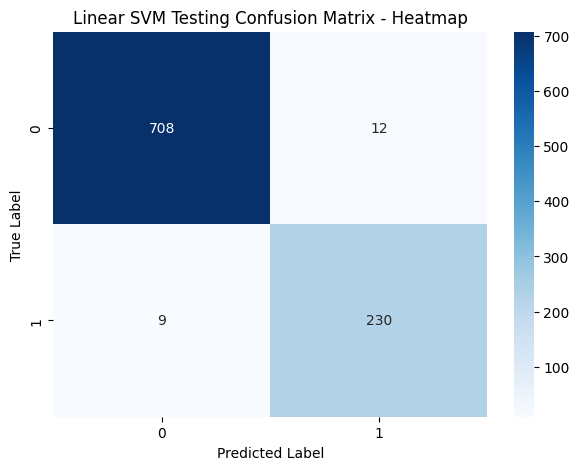

In [11]:
# Linear SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train a linear SVM model
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train_binned)

# Predict on the test set
y_train_pred = linear_svm.predict(X_train)
y_test_pred = linear_svm.predict(X_test)

# Evaluate performance
print("Linear SVM - Training Accuracy:", accuracy_score(y_train_binned, y_train_pred))
print("Linear SVM - Testing Accuracy:", accuracy_score(y_test_binned, y_test_pred))

# Confusion Matrix
train_conf_matrix = confusion_matrix(y_train_binned, y_train_pred)
test_conf_matrix = confusion_matrix(y_test_binned, y_test_pred)

# Visualize testing confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Linear SVM Testing Confusion Matrix - Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


RBF SVM - Training Accuracy: 0.7809076682316118
RBF SVM - Testing Accuracy: 0.7507820646506778


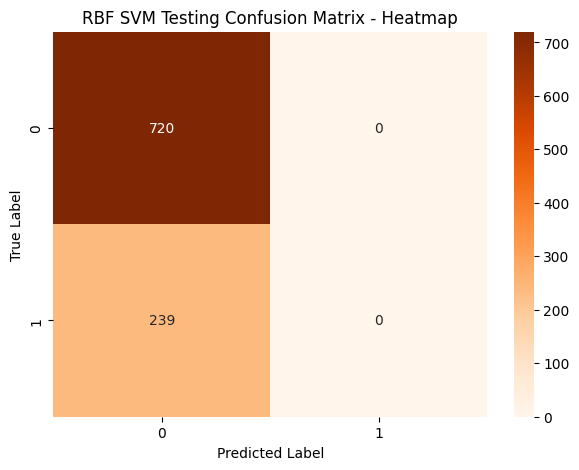

In [12]:
# Non-linear SVM (RBF Kernel)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train an SVM model with the RBF kernel
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train, y_train_binned)

# Predict on the test set
y_train_pred = rbf_svm.predict(X_train)
y_test_pred = rbf_svm.predict(X_test)

# Evaluate performance
print("RBF SVM - Training Accuracy:", accuracy_score(y_train_binned, y_train_pred))
print("RBF SVM - Testing Accuracy:", accuracy_score(y_test_binned, y_test_pred))

# Confusion Matrix
train_conf_matrix = confusion_matrix(y_train_binned, y_train_pred)
test_conf_matrix = confusion_matrix(y_test_binned, y_test_pred)

# Visualize testing confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title("RBF SVM Testing Confusion Matrix - Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Multi-class SVM - Training Accuracy: 0.9906103286384976
Multi-class SVM - Testing Accuracy: 0.9781021897810219


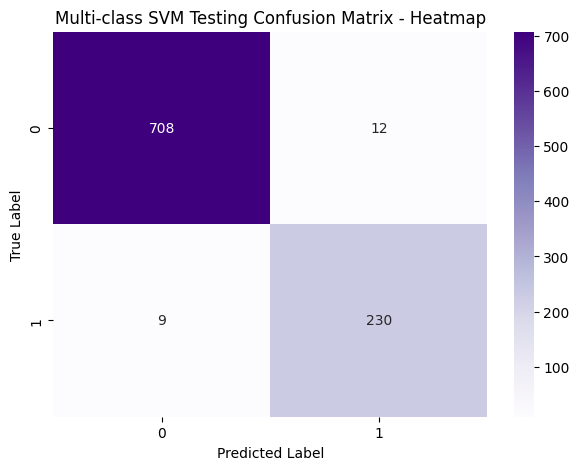

In [13]:
# Multi-class SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# For multi-class classification, SVM automatically uses 'one-vs-one' approach.
multi_svm = SVC(kernel='linear', decision_function_shape='ovo', random_state=42)
multi_svm.fit(X_train, y_train_binned)

# Predict on the test set
y_train_pred = multi_svm.predict(X_train)
y_test_pred = multi_svm.predict(X_test)

# Evaluate performance
print("Multi-class SVM - Training Accuracy:", accuracy_score(y_train_binned, y_train_pred))
print("Multi-class SVM - Testing Accuracy:", accuracy_score(y_test_binned, y_test_pred))

# Confusion Matrix
train_conf_matrix = confusion_matrix(y_train_binned, y_train_pred)
test_conf_matrix = confusion_matrix(y_test_binned, y_test_pred)

# Visualize testing confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title("Multi-class SVM Testing Confusion Matrix - Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Naive Bayes - Training Accuracy: 0.8252477829942618
Naive Bayes - Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.78      0.87      2994
         1.0       0.56      0.99      0.71       840

    accuracy                           0.83      3834
   macro avg       0.78      0.89      0.79      3834
weighted avg       0.90      0.83      0.84      3834

Naive Bayes - Testing Accuracy: 0.8289885297184567
Naive Bayes - Testing Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.77      0.87       720
         1.0       0.59      1.00      0.74       239

    accuracy                           0.83       959
   macro avg       0.80      0.88      0.81       959
weighted avg       0.90      0.83      0.84       959



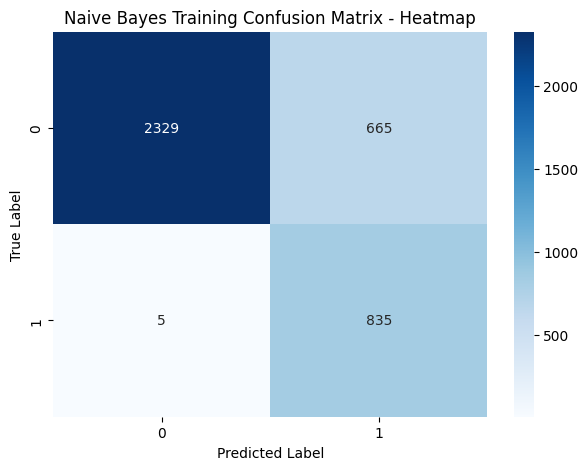

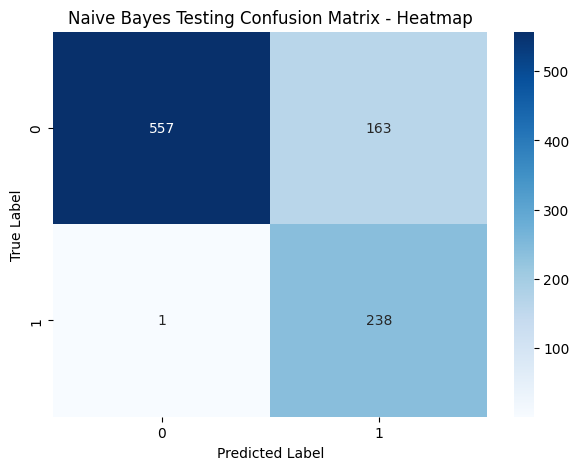

In [14]:
#NAIVE BAYES
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Instantiate and train the model
nb = GaussianNB()
nb.fit(X_train, y_train_binned)

# Predict on the test set
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Training evaluation
train_accuracy = accuracy_score(y_train_binned, y_train_pred)
train_class_report = classification_report(y_train_binned, y_train_pred)

# Testing evaluation
test_accuracy = accuracy_score(y_test_binned, y_test_pred)
test_class_report = classification_report(y_test_binned, y_test_pred)

# Print evaluation metrics
print("Naive Bayes - Training Accuracy:", train_accuracy)
print("Naive Bayes - Training Classification Report:\n", train_class_report)

print("Naive Bayes - Testing Accuracy:", test_accuracy)
print("Naive Bayes - Testing Classification Report:\n", test_class_report)

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train_binned, y_train_pred)

# Confusion matrix for testing data
test_conf_matrix = confusion_matrix(y_test_binned, y_test_pred)

# Visualize training confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Training Confusion Matrix - Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize testing confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Testing Confusion Matrix - Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Lasso Regression - Mean Squared Error: 24.984696699072956
Lasso Regression - R^2 Score: 0.9605790406969862


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.085e+04, tolerance: 2.260e+02
  model = cd_fast.enet_coordinate_descent(


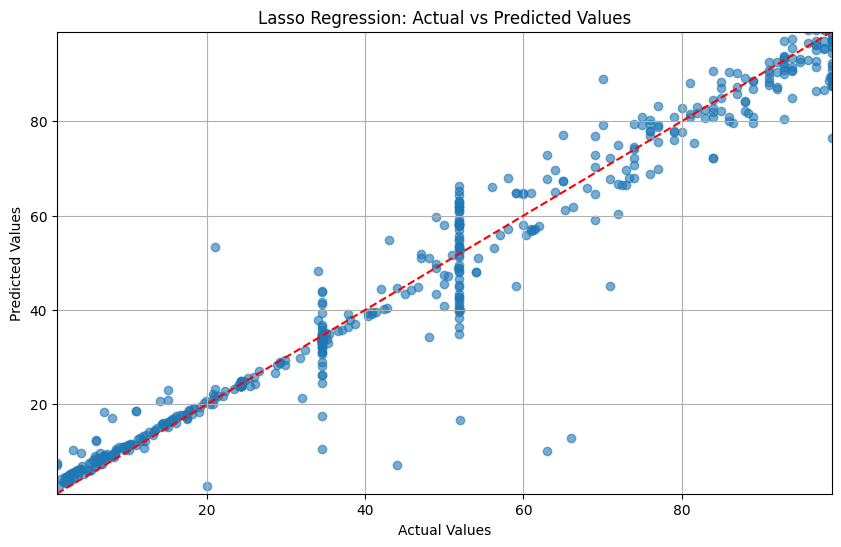

In [15]:
#L1 REGULARISATION
# Import necessary libraries
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Instantiate and train the model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression - Mean Squared Error:", mse)
print("Lasso Regression - R^2 Score:", r2)

# Scatter plot to visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect prediction
plt.title("Lasso Regression: Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02704e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression - Mean Squared Error: 24.808324119012294
Ridge Regression - R^2 Score: 0.9608573220939741


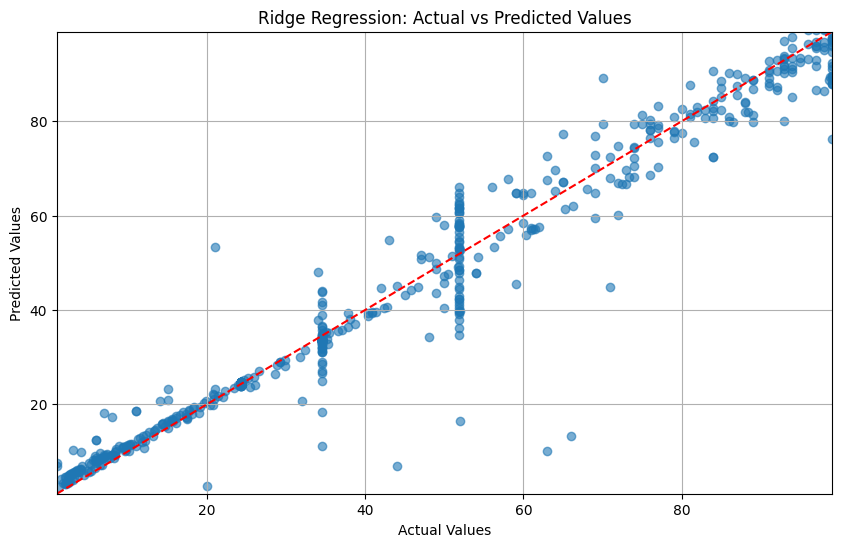

In [16]:
#L2 REGULARISATION
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Instantiate and train the model
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test)

# Print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression - Mean Squared Error:", mse)
print("Ridge Regression - R^2 Score:", r2)

# Scatter plot to visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect prediction
plt.title("Ridge Regression: Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()


In [17]:
from scipy import stats
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Instantiate regression models
rf = RandomForestRegressor(random_state=42)
svm = SVR()

# Compare models using cross-validation scores (e.g., Random Forest and SVM)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for easier interpretation
rf_scores = -rf_scores
svm_scores = -svm_scores

# Perform T-test
t_statistic, p_value = stats.ttest_ind(rf_scores, svm_scores)

# Print T-statistic and P-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation
print("\nInterpretation:")
if p_value < 0.05:
    print("The p-value is less than 0.05, indicating a statistically significant difference between the performance of the two models.")
    if t_statistic < 0:
        print("The negative T-statistic suggests that the SVM model has a higher mean squared error than the Random Forest model.")
else:
    print("The p-value is greater than or equal to 0.05, indicating no statistically significant difference between the performance of the two models.")


T-statistic: -32.695692418100336
P-value: 8.349035002800324e-10

Interpretation:
The p-value is less than 0.05, indicating a statistically significant difference between the performance of the two models.
The negative T-statistic suggests that the SVM model has a higher mean squared error than the Random Forest model.


F-statistic for comparing Random Forest and SVM: 267.25207567475604


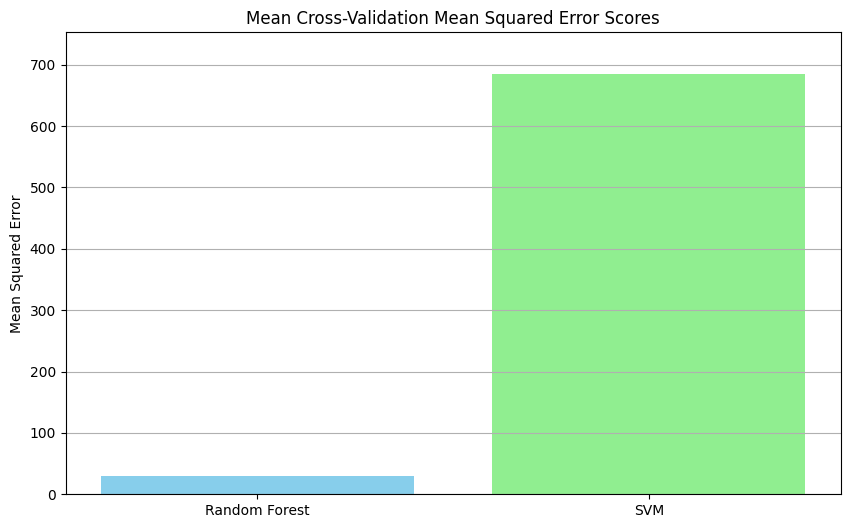

In [18]:
#FTEST
# Import necessary libraries
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Instantiate regression models
rf = RandomForestRegressor(random_state=42)
svm = SVR()

# Compare models using cross-validation scores (e.g., Random Forest and SVM)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for easier interpretation
rf_scores = -rf_scores
svm_scores = -svm_scores

# Calculate the F-statistic
f_statistic = ((rf_scores.mean() - svm_scores.mean()) ** 2) / (rf_scores.var() + svm_scores.var())
print("F-statistic for comparing Random Forest and SVM:", f_statistic)

# Optional: Visualize the mean cross-validation scores using a bar plot
mean_scores = [rf_scores.mean(), svm_scores.mean()]
models = ['Random Forest', 'SVM']

plt.figure(figsize=(10, 6))
plt.bar(models, mean_scores, color=['skyblue', 'lightgreen'])
plt.title('Mean Cross-Validation Mean Squared Error Scores')
plt.ylabel('Mean Squared Error')
plt.ylim(0, max(mean_scores) * 1.1)  # Add some space above the highest bar
plt.grid(axis='y')
plt.show()


In [19]:
#MC NEMARS TEST
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.contingency_tables import mcnemar

# Load the dataset
data_path = '/content/drive/MyDrive/un_project_data/cleaned_dataset.csv'
data = pd.read_csv(data_path)

# Fill missing values in the entire DataFrame using forward fill
data.ffill(inplace=True)  # More straightforward usage

# Separate features (X) and target (y)
X = data.drop(columns=['2022'])
y = data['2022']

# Check for NaN values in target variable
if y.isnull().any():
    print("NaN values found in target variable. Handling them...")
    y.fillna(y.mean(), inplace=True)  # Fill NaN values with the mean of the target variable

# Separate numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Impute missing values in numeric columns
imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = imputer.fit_transform(X[numeric_cols])

# Handle non-numeric columns (e.g., by encoding or filling missing values)
X_non_numeric = X[non_numeric_cols].apply(lambda col: col.fillna('Unknown'))
label_encoders = {}
for col in X_non_numeric.columns:
    le = LabelEncoder()
    X_non_numeric[col] = le.fit_transform(X_non_numeric[col].astype(str))
    label_encoders[col] = le

# Combine numeric and non-numeric data back together
X_imputed = np.hstack((X_numeric_imputed, X_non_numeric.values))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Check for NaN values in y_train after the split
if np.isnan(y_train).any():
    print("NaN values found in training target variable. Handling them...")
    y_train = np.nan_to_num(y_train)  # Convert NaNs to zeros or some other strategy

if np.isnan(y_test).any():
    print("NaN values found in testing target variable. Handling them...")
    y_test = np.nan_to_num(y_test)

# Train models
rf = RandomForestRegressor(random_state=42)
svm = SVR()

# Fit the models
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Generate predictions for the test set from both models
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Convert predictions to binary for McNemar's test
# Assuming a threshold of 0.5 for binary classification
y_pred_rf_binary = (y_pred_rf >= 0.5).astype(int)
y_pred_svm_binary = (y_pred_svm >= 0.5).astype(int)
y_test_binary = (y_test >= 0.5).astype(int)

# Construct a 2x2 contingency table
contingency_table = np.array([
    [np.sum((y_pred_rf_binary == y_test_binary) & (y_pred_svm_binary == y_test_binary)),  # Both correct
     np.sum((y_pred_rf_binary == y_test_binary) & (y_pred_svm_binary != y_test_binary))],  # RF correct, SVM wrong
    [np.sum((y_pred_rf_binary != y_test_binary) & (y_pred_svm_binary == y_test_binary)),  # SVM correct, RF wrong
     np.sum((y_pred_rf_binary != y_test_binary) & (y_pred_svm_binary != y_test_binary))]   # Both wrong
]).reshape(2, 2)

# Display the contingency table
print("\nContingency Table:")
print(pd.DataFrame(contingency_table,
                   columns=['SVM Correct', 'SVM Incorrect'],
                   index=['RF Correct', 'RF Incorrect']))

# Run McNemar's Test
result = mcnemar(contingency_table, exact=True)
print("\nMcNemar's Test Statistic:", result.statistic)
print("McNemar's p-value:", result.pvalue)

# Interpretation
if result.pvalue < 0.05:
    print("The performance difference between the models is statistically significant.")
else:
    print("The performance difference between the models is not statistically significant.")
Mut

NaN values found in target variable. Handling them...

Contingency Table:
              SVM Correct  SVM Incorrect
RF Correct            959              0
RF Incorrect            0              0

McNemar's Test Statistic: 0.0
McNemar's p-value: 1.0
The performance difference between the models is not statistically significant.


NameError: name 'Mut' is not defined